# DEMO: simple example

In [9]:
from probabilistic_library import Stochast, DistributionType
from probabilistic_library import UncertaintyProject, UncertaintyMethod
from probabilistic_library import ReliabilityProject, ReliabilityMethod 
from probabilistic_library import CombineProject, CombineType, CombinerMethod
import numpy as np

### Random variable

Variable:
  distribution = log_normal
Definition:
  location = 2
  scale = 0.5
  shift = 5
Derived values:
  mean = 13.37
  deviation = 4.462
  variation = 0.3337


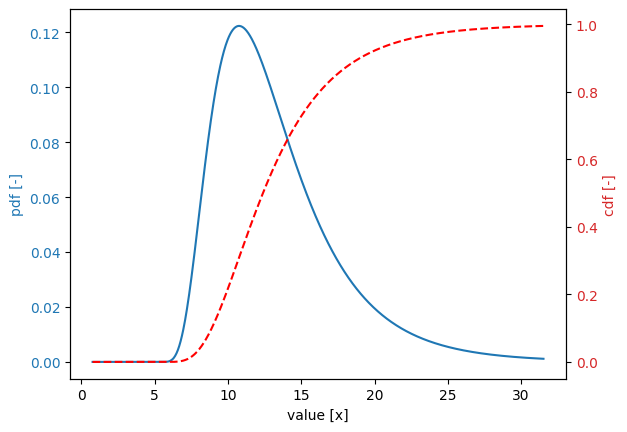

In [10]:
x = Stochast()

x.distribution = DistributionType.log_normal
x.location = 2.0
x.scale = 0.5
x.shift = 5.0

x.print()
x.plot()

In [11]:
print(x.get_cdf(10.0))
print(x.get_pdf(10.0))

0.2173647322715113
0.11761875751402896


### Model

In [12]:
def hunt(t_p, tan_alpha, h_s, h_crest, h):
    g = 9.81
    l_0 = g  * t_p * t_p
    xi = tan_alpha / np.sqrt(2 * np.pi * h_s / l_0)
    r_u = xi * h_s

    Z = h_crest - (h + r_u)
    return Z

### Uncertainty analysis

Defining the uncertainty project:

In [ ]:
project = UncertaintyProject()
project.model = hunt # reference to the model

Model hunt:
Input parameters:
  t_p
  tan_alpha
  h_s
  h_crest
  h
Output parameters:
  Z


Defining random variables (based on the input parameters):

In [14]:
project.variables["t_p"].distribution = DistributionType.log_normal
project.variables["t_p"].mean = 6
project.variables["t_p"].deviation = 2

project.variables["tan_alpha"].distribution = DistributionType.deterministic
project.variables["tan_alpha"].mean = 0.333333

project.variables["h_s"].distribution = DistributionType.log_normal
project.variables["h_s"].mean = 3
project.variables["h_s"].deviation = 1

project.variables["h_crest"].distribution = DistributionType.log_normal
project.variables["h_crest"].mean = 10
project.variables["h_crest"].deviation = 0.05

project.variables["h"].distribution = DistributionType.exponential
project.variables["h"].shift = 0.5
project.variables["h"].scale = 1

Getting insight into the random variable $h$:

Variable h:
  distribution = exponential
Definition:
  scale = 1
  shift = 0.5
Derived values:
  mean = 1.5
  deviation = 1
  variation = 0.6667


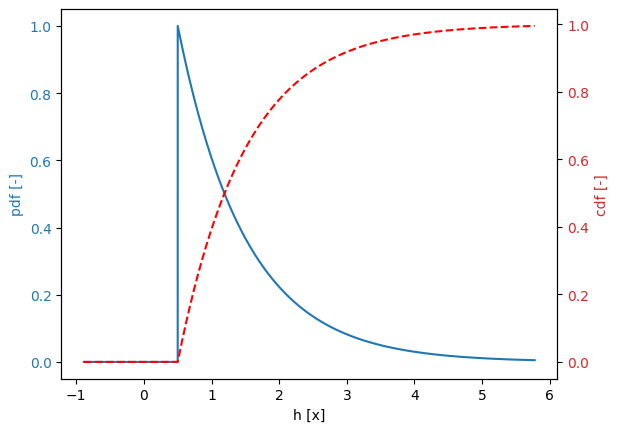

In [15]:
project.variables["h"].print()
project.variables["h"].plot()

Choosing calculation method and settings:

In [8]:
project.settings.uncertainty_method = UncertaintyMethod.crude_monte_carlo
project.settings.minimum_samples = 1000
project.settings.maximum_samples = 50000
project.settings.variation_coefficient = 0.02

Running uncertainty analysis:

In [ ]:
project.run()

Getting the results:

In [ ]:
z_value = project.stochast # the result is a distribution of the model output

z_value.print()
z_value.plot()

### Reliability analysis

Defining the reliability project:

In [ ]:
project = ReliabilityProject()
project.model = hunt

Defining random variables (based on the input parameters):

In [ ]:
project.variables["t_p"].distribution = DistributionType.log_normal
project.variables["t_p"].mean = 6
project.variables["t_p"].deviation = 2

project.variables["tan_alpha"].distribution = DistributionType.deterministic
project.variables["tan_alpha"].mean = 0.333333

project.variables["h_s"].distribution = DistributionType.log_normal
project.variables["h_s"].mean = 3
project.variables["h_s"].deviation = 1

project.variables["h_crest"].distribution = DistributionType.log_normal
project.variables["h_crest"].mean = 10
project.variables["h_crest"].deviation = 0.05

project.variables["h"].distribution = DistributionType.exponential
project.variables["h"].shift = 0.5
project.variables["h"].scale = 1

Choosing calculation method and settings:

In [ ]:
project.settings.reliability_method = ReliabilityMethod.form
project.settings.relaxation_factor = 0.75
project.settings.maximum_iterations = 50
project.settings.variation_coefficient = 0.02

# we save the semi-results
project.settings.save_convergence = True 
project.settings.save_realizations = True

Running reliability calculations, finding $P(Z<0)$:

In [ ]:
project.run()

Getting the results:

In [ ]:
project.design_point.print()
dp_1 = project.design_point # we save this result for later use

project.design_point.plot_alphas()
project.design_point.plot_convergence()
project.design_point.plot_realizations()

### Reliability analysis of a system

Defining the second model:

In [ ]:
def water_level(h):
    Z = 3.0 - h
    return Z

Running reliability calculations, finding $P(h>3.0)$:

In [ ]:
project.model = water_level

project.variables["h"].distribution = DistributionType.exponential
project.variables["h"].shift = 0.5
project.variables["h"].scale = 1

project.settings.reliability_method = ReliabilityMethod.form
project.settings.relaxation_factor = 0.75
project.settings.maximum_iterations = 50
project.settings.variation_coefficient = 0.02

project.run()

project.design_point.print()
dp_2 = project.design_point # we save this result for later

Defining a project for system reliability, $P(Z<0 \cup h>3.0)$:

In [ ]:
combine_project = CombineProject()

combine_project.design_points.append(dp_1)
combine_project.design_points.append(dp_2)

combine_project.settings.combine_type = CombineType.series # one of the events needs to occur to have a failure
combine_project.settings.combiner_method = CombinerMethod.hohenbichler # calculation method

Running the system reliability:

In [ ]:
combine_project.run()

Getting the results (failure probability):

In [ ]:
print(f"P(Z>0): {dp_1.probability_failure}")

print(f"P(h>3.0): {dp_2.probability_failure}")

print(f"P(Z<0 or h>3.0): {combine_project.design_point.probability_failure}")

# use combine_project.design_point.print() for more detailed results

Changing the correlation of variable $h$:

In [ ]:
combine_project.correlation_matrix["h"] = 0.0

combine_project.run()

print(f"P(Z<0 or h>3.0): {combine_project.design_point.probability_failure}")